<a href="https://colab.research.google.com/github/drshahizan/research-design/blob/main/proposal/proposal24251/NurAdrianaBatrisyia/Chapter%204/EDA_Money_Laundering_Detection.ipynbEDA_Money_Laundering_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# File path
file_path = '/content/drive/My Drive/Money Laundering Detection/SAML-D.csv'

# Load the dataset
df = pd.read_csv(file_path)

df

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


In [ ]:
df.shape

(9504852, 12)

In [ ]:
df.head(5)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [ ]:
df.tail(5)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
9504851,10:57:12,2023-08-23,105185176,6824994831,9586.08,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_Out


In [ ]:
print('Data Types:')
print(df.dtypes)

Data Types:
Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object


In [ ]:
#Convert 'Time' and 'Date' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Date'] = pd.to_datetime(df['Date'])

print('Data Types:')
print(df.dtypes)

Data Types:
Time                      datetime64[ns]
Date                      datetime64[ns]
Sender_account                     int64
Receiver_account                   int64
Amount                           float64
Payment_currency                  object
Received_currency                 object
Sender_bank_location              object
Receiver_bank_location            object
Payment_type                      object
Is_laundering                      int64
Laundering_type                   object
dtype: object


In [ ]:
#Extract year and month from 'Date' column and create new column
df['Year-Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['Year-Month'].astype(str).unique().tolist()

['2022-10',
 '2022-11',
 '2022-12',
 '2023-01',
 '2023-02',
 '2023-03',
 '2023-04',
 '2023-05',
 '2023-06',
 '2023-07',
 '2023-08']

###**Identify Min, Max, and Mean for Laundering and Normal Transactions**

In [ ]:
laundering_stats = df[df['Is_laundering'] == 1]['Amount'].agg(['max', 'mean', 'min'])

normal_stats = df[df['Is_laundering'] == 0]['Amount'].agg(['max', 'mean', 'min'])

print("Laundering Transactions Stats:")
print(laundering_stats.apply(lambda x: f"{x:,.2f}"))
print("\nNormal Transactions Stats:")
print(normal_stats.apply(lambda x: f"{x:,.2f}"))

Laundering Transactions Stats:
max     12,618,498.40
mean        40,587.67
min             15.82
Name: Amount, dtype: object

Normal Transactions Stats:
max     999,962.19
mean      8,729.88
min           3.73
Name: Amount, dtype: object


<Figure size 2000x1000 with 0 Axes>

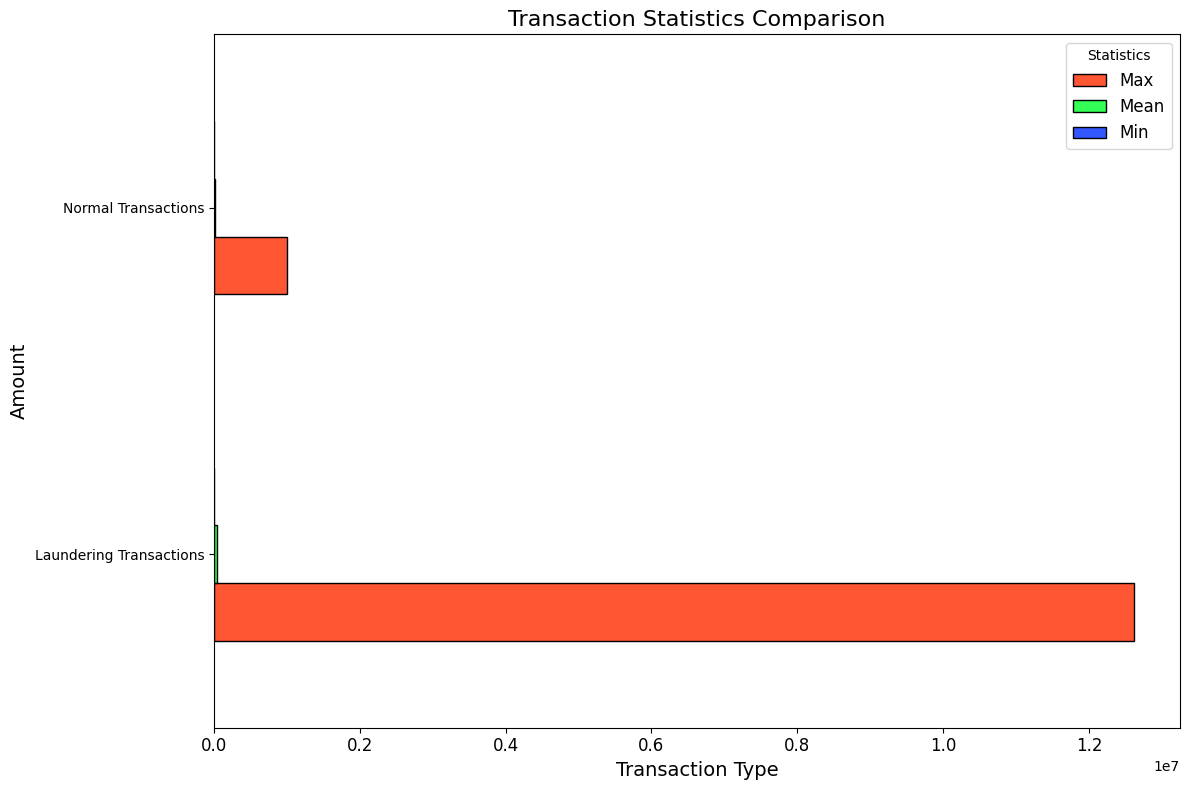

In [ ]:
# Prepare data for visualization
stats_data = pd.DataFrame({
    "Laundering Transactions": laundering_stats,
    "Normal Transactions": normal_stats
})

# Transpose to make stats the x-axis
stats_data = stats_data.T  # Transpose the DataFrame

# Visualization
plt.figure(figsize=(20, 10))

# Plot the data
stats_data.plot(kind='barh', figsize=(12, 8), edgecolor='black', color=['#FF5733', '#33FF57', '#3357FF'])

# Add labels and title
plt.title("Transaction Statistics Comparison", fontsize=16)
plt.xlabel("Transaction Type", fontsize=14)
plt.ylabel("Amount", fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Adjust x-axis labels
plt.legend(title="Statistics", labels=["Max", "Mean", "Min"], fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

###**Identify most frequent typologies for laundering transactions**

<ipython-input-12-c52a0026b578>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


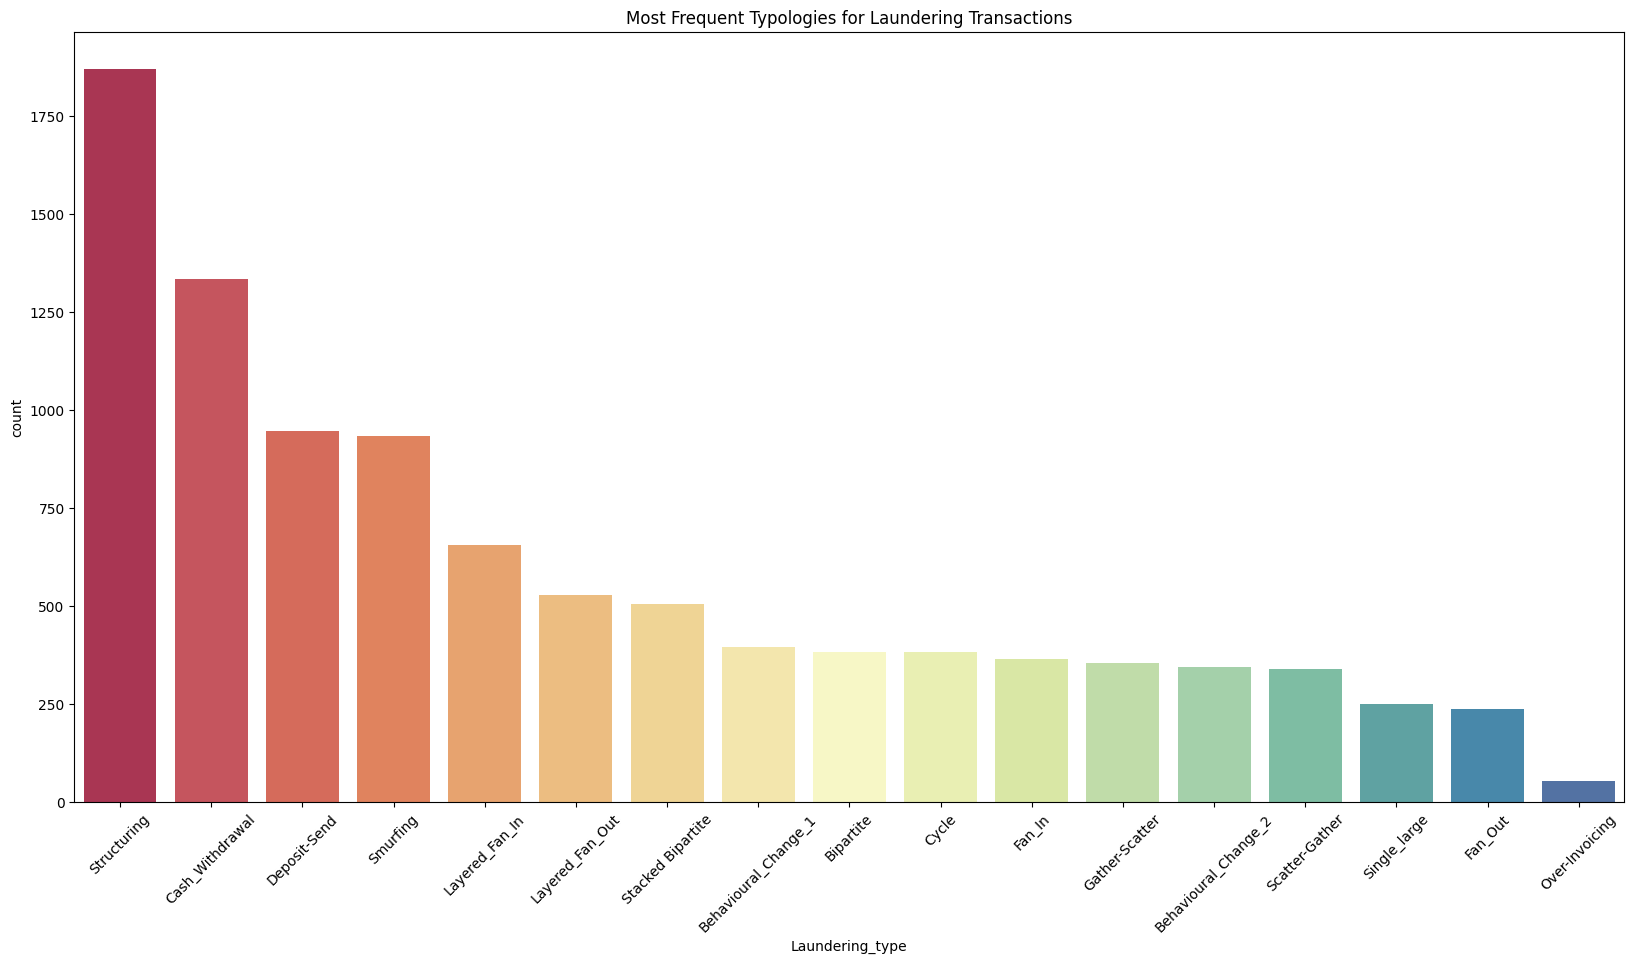

In [ ]:
plt.figure(figsize=(20, 10))
laundering_counts = df[df['Is_laundering'] == 1]['Laundering_type'].value_counts()

sns.countplot(
    data=df[df['Is_laundering'] == 1],
    x='Laundering_type',
    order=laundering_counts.index,
    palette='Spectral')

plt.xticks(rotation=45)
plt.title('Most Frequent Typologies for Laundering Transactions')
plt.show();

###**Identify Most Frequent Payment Types for Laundering Transactions**

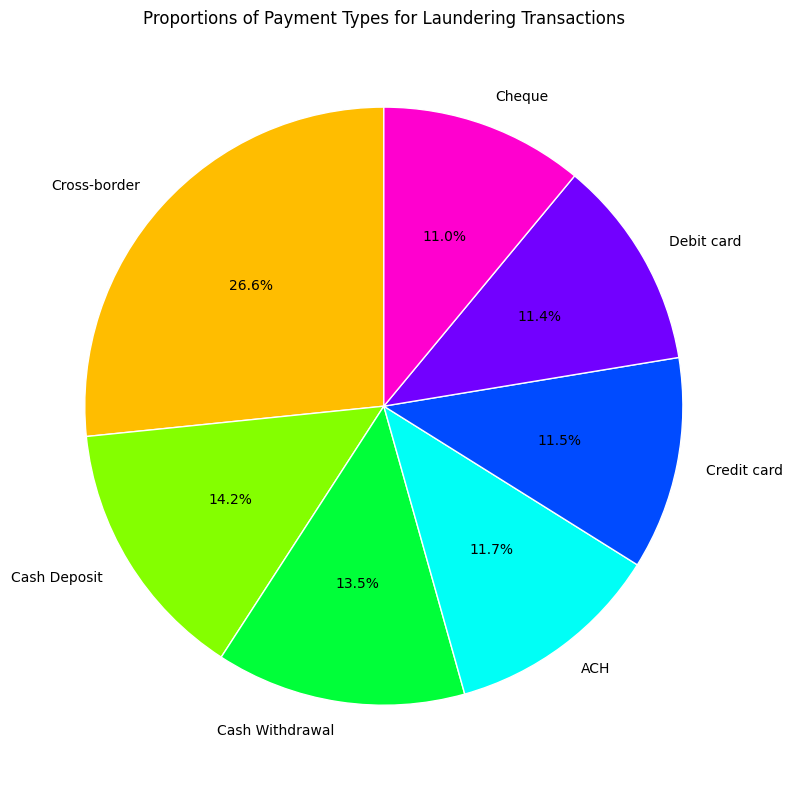

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the figure size

# Calculate counts for laundering payment types
laundering_counts = df[df['Is_laundering'] == 1]['Payment_type'].value_counts()

# Generate a unique color palette with the same number of colors as the slices
colors = sns.color_palette('hsv', len(laundering_counts))  # Use the 'hsv' colormap for varied colors

# Plot pie chart
plt.pie(
    laundering_counts.values,  # Values to plot
    labels=laundering_counts.index,  # Labels for each slice
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=90,  # Rotate pie for better readability
    colors=colors,  # Apply unique colors
    wedgeprops={'edgecolor': 'white'}  # Add white edges for better distinction
)

# Add title
plt.title('Proportions of Payment Types for Laundering Transactions')

# Show the plot
plt.tight_layout()
plt.show()


###**Identify Laundering Transactions by Year-Month and Laundering Type**

<Figure size 2000x1000 with 0 Axes>

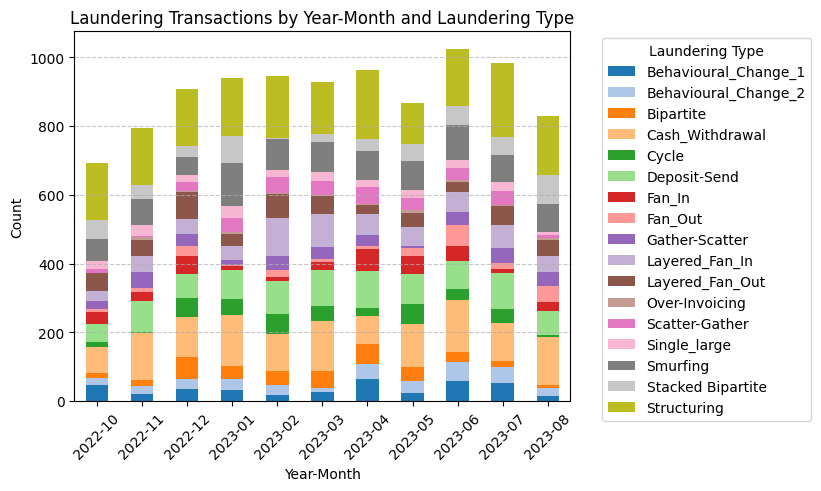

In [ ]:
from matplotlib.cm import get_cmap
plt.figure(figsize=(20, 10))

laundering_counts = df[df['Is_laundering'] == 1].groupby(['Year-Month', 'Laundering_type']).size().unstack(fill_value=0)
laundering_counts.plot(kind='bar', stacked=True, color=sns.color_palette('tab20', df['Laundering_type'].nunique()))
plt.title('Laundering Transactions by Year-Month and Laundering Type')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Laundering Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

###**Identify Average Monthly Transactions Amount by Transactions Type**

In [ ]:
average_transactions = df.groupby(['Year-Month', 'Is_laundering'])['Amount'].mean().unstack()
average_transactions

Is_laundering,0,1
Year-Month,,
2022-10,8694.868942,26885.332040
2022-11,8646.713555,73472.947836
2022-12,8840.117463,33175.336909
2023-01,8827.964270,41949.757851
2023-02,8698.100966,29227.505709
2023-03,8918.772393,31951.595670
2023-04,8825.465073,30336.138455
2023-05,8615.085020,65756.631623
2023-06,8634.518612,45245.846035


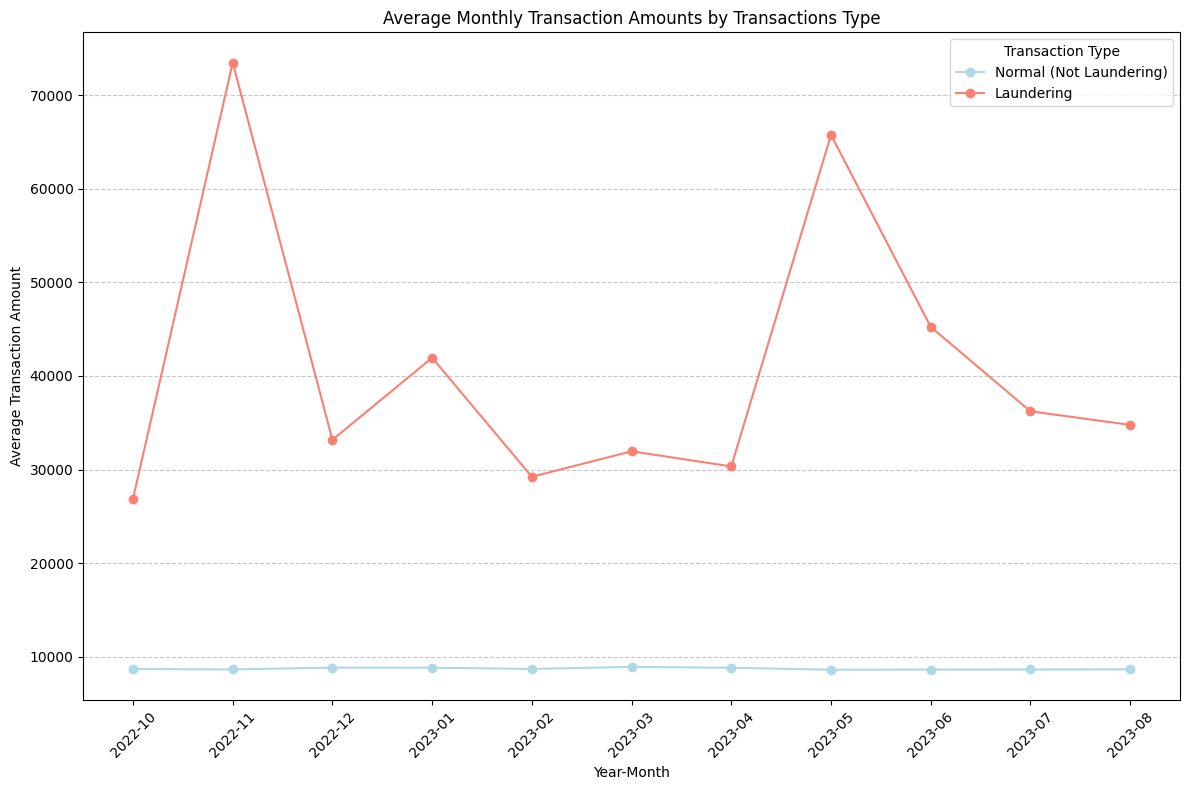

In [ ]:
# Convert PeriodIndex to string for plotting
average_transactions.index = average_transactions.index.astype(str)

# Plot the line chart
plt.figure(figsize=(12, 8))  # Set the figure size

# Plot lines for normal and laundering transactions
plt.plot(average_transactions.index, average_transactions[0], label='Normal (Not Laundering)', color='lightblue', marker='o')
plt.plot(average_transactions.index, average_transactions[1], label='Laundering', color='salmon', marker='o')

# Add titles and labels
plt.title('Average Monthly Transaction Amounts by Transactions Type')
plt.xlabel('Year-Month')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add legend and grid
plt.legend(title='Transaction Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()